# This Notebook is Created for Hacktiv8s Talent Fair to Analyze the Data from a Hiring Partner and Create a Dashboard. 
# Created by Prayoga Agusto Haradi

## Dashboard Link

[Tableau](https://public.tableau.com/app/profile/prayoga.haradi/viz/TalentFair5Final/Dashboard2?publish=yes) dashboard can be found here.

## Background

In the world of finance, the loan approval process forms a vital component of operations, balancing between a borrower's capacity to repay and the institution's risk tolerance. Numerous variables come into play, from individual demographics to detailed financial histories. However, these processes are not without their challenges.

Key among these challenges is the question of fairness and transparency. Do biases exist that inadvertently impact certain demographic groups more than others when it comes to loan approvals? Does having a good credit history or high income guarantee approval? Furthermore, how do personal circumstances, such as the number of dependents, affect the loan approval? These questions form the crux of our mission, as we aim to decipher the patterns and trends within our loan data to ensure a more equitable and fair loan approval process.

## Objective

Our mission is to navigate through the problem of loan approvals, uncovering the secrets that lead to a successful application. As if we're financial detectives, we'll decode patterns within the data, unraveling the key factors that influence the approval decision.

An intriguing area to explore is the role of demographics. How does an applicant's background, like their education level, marital status, or property location, intersect with their chances of getting a loan? This exploration will shed light on potential disparities and ensure we are aware of any unintentional biases in the loan approval process.

One cornerstone of our investigation is understanding the impact of credit history. It's commonly accepted that good credit history is vital for approval, but we aim to quantify its influence and establish clear, evidence-based guidelines.

Furthermore, we will examine the intricate relationship between an applicant's income and the loan amount. By understanding this correlation, we can gain insights into how financial capability affects the loan granting process.

Lastly, we want to dive into the effects of having dependents on loan approval. It's these finer details that contribute to a well-rounded understanding of the process, ultimately enabling us to make more informed and equitable decisions.

## Problem Statement


1. **Loan Approval Rates**: The primary goal is to identify which factors influence loan approval. Understanding these factors will help us predict future loan approval possibilities.

2. **Demographic Analysis**: We aim to investigate the role of demographic variables, such as gender, marital status, education, and property area, in loan approval. The objective is to identify any potential disparities among different demographic groups.

3. **Credit History Impact**: Another important aspect is understanding the influence of credit history on loan approval. We assume applicants with a good credit history are more likely to get their loans approved, but the analysis will confirm this.

4. **Income vs. Loan Amount**: We plan to analyse the relationship between an applicant's income (including co-applicant income) and the loan amount requested. This will help us to understand if there's a correlation.

5. **Loan Amount Distribution**: Investigating the distribution of loan amounts could reveal any skewness or anomalies that need to be addressed in the loan-granting process.

6. **Role of Dependents**: We will also examine whether the number of dependents an applicant has affects their chance of loan approval.

Through these problem statements, we aim to provide a comprehensive analysis of the loan approval process.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Data Loading

First we will load the data using pandas.

In [2]:
df_train = pd.read_csv('lion-loan-train.csv')
df_test = pd.read_csv('lion-loan-test.csv')

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
df_test.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


## Exploratory Data Analysis

For this case, I will mainly be focusing on analyzing the data of the applicants in the train data set, mainly because the train data set has a loan status column that can help identify if an applicant had their loan approved, where as the test dataset is mainly for predicting if the applicant will be approved or not based on their data. Since we only be focusing on the visualization, we will not use the test dataset.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Let us see the amount of unique values in each column.

In [9]:
df_train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
#Checking duplicates of data
df_train[df_train.duplicated(keep=False)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


There seems to be no duplicates in our data set.

In [11]:
# Identify categorical columns (without including the Loan ID)
df_cat = df_train.drop(axis=1,columns='Loan_ID')
categorical_cols = df_cat.select_dtypes(include=['object']).columns


# Display unique values for each categorical column
for col in categorical_cols:
    print(f"Unique values in {col}: {df_cat[col].unique()}")

Unique values in Gender: ['Male' 'Female' nan]
Unique values in Married: ['No' 'Yes' nan]
Unique values in Dependents: ['0' '1' '2' '3+' nan]
Unique values in Education: ['Graduate' 'Not Graduate']
Unique values in Self_Employed: ['No' 'Yes' nan]
Unique values in Property_Area: ['Urban' 'Rural' 'Semiurban']
Unique values in Loan_Status: ['Y' 'N']


### Missing Value Handling

From our exploration above, we can see that our columns from the dataset has a significant amount of missing values that needs to be adressed further. In order to do that, we will first handle the missing values by exploring the missing values for each column and find the most fitting type of missing value that could correspond with each column (MAR,MCAR or MNAR).

In [12]:
import pandas as pd

# Assuming df is your DataFrame
def calculate_missing_values(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) * 100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

missing_data = calculate_missing_values(df_train)
print(missing_data)


                   Total   Percent
Credit_History        50  8.143322
Self_Employed         32  5.211726
LoanAmount            22  3.583062
Dependents            15  2.442997
Loan_Amount_Term      14  2.280130
Gender                13  2.117264
Married                3  0.488599
Loan_ID                0  0.000000
Education              0  0.000000
ApplicantIncome        0  0.000000
CoapplicantIncome      0  0.000000
Property_Area          0  0.000000
Loan_Status            0  0.000000


It seems there are 7 columns with missing values, these values needs to be handled first before we visualize and interpret our data set.

Afterwards, let us query all of the rows with missing values in each column to understand the tendencies of the missing data.

In [13]:
df_train[df_train['Gender'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [14]:
df_train[df_train['Married'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [15]:
df_train[df_train['Dependents'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [16]:
df_train[df_train['Self_Employed'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [17]:
df_train[df_train['LoanAmount'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [18]:
df_train[df_train['Loan_Amount_Term'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [19]:
df_train[df_train['Credit_History'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


From the queries above, we will be concluding that for most of the columns our data has a missing at random (MAR) pattern. However, in my personal opinion, the Credit_History column has a missing completely at random pattern (MCAR), I assume the column has a MCAR pattern due to the fact that there should be no particular reason on why the credit history of our previous applicant would be missing due to them not writing down their loan history, and is more likely that our company has an error in the data collection process. Since, we could not consult with the data collection team, we will instead assume that is MCAR instead.

For this case, while there are difference in the missing value types for the columns, due to the relatively small amount of missing data for each of the columns, we will be imputing the categorical data with the mode of the column, whereas our numerical column with missing values (Loan Amount), we will be handling it with two different methods of imputation which are median imputation and Sci-Kit Learn IterativeImputer module.

<Axes: xlabel='LoanAmount', ylabel='Count'>

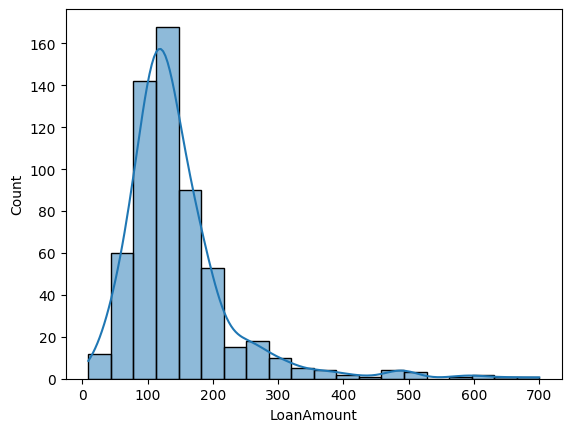

In [20]:
sns.histplot(kde=True,x=df_train['LoanAmount'],bins=20)

Why do we use those two specific imputation methods for the loan amount? 
- Due to the right skewed data in the loan amount column, using mean imputation would cause our data to lessen the skew amount of our original dataset and could instead convey a completely different applicant tendency compared to what is actually our applicant, the median is more robust towards outlier which is far better in preserving the tendencies of our original data. It is also easy to compute and understand, which makes it a good choice when simplicity is valued, though it may not capture complex relationships with other variables.

- IterativeImputer is a more sophisticated method which models each feature with missing values as a function of other features in a round-robin fashion. This method can capture the relationships between 'Loan Amount' and other variables in the dataset, potentially leading to more accurate imputations. This can be particularly important when the missingness in 'Loan Amount' is related to values in other columns (Missing At Random scenario). However, it comes at the cost of greater computational complexity and can be harder to explain.

In [21]:
df_median = df_train.copy()
df_imp = df_train.copy()

In [22]:
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History','Loan_Amount_Term']:
    df_median[column].fillna(df_median[column].mode()[0], inplace=True)
    df_imp[column].fillna(df_imp[column].mode()[0], inplace=True)

In [23]:
df_median['LoanAmount'].fillna(df_median['LoanAmount'].median(), inplace=True)

In [24]:
# Instantiate the iterative imputer
imp = IterativeImputer(max_iter=10, random_state=0)

# Use the imputer to fill missing values in 'LoanAmount'
df_imp['LoanAmount'] = imp.fit_transform(df_imp[['LoanAmount']])

<Axes: xlabel='LoanAmount', ylabel='Count'>

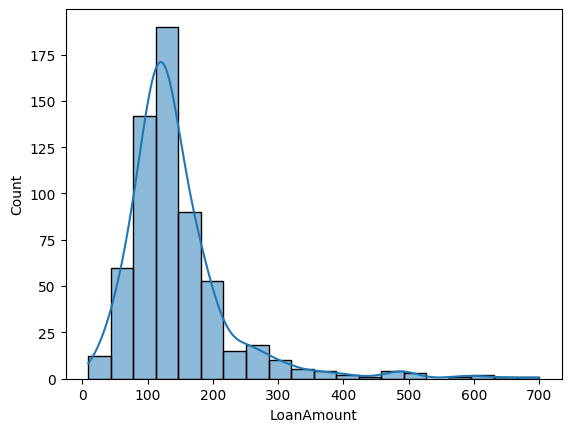

In [25]:
sns.histplot(kde=True,x=df_median['LoanAmount'],bins=20)

<Axes: xlabel='LoanAmount', ylabel='Count'>

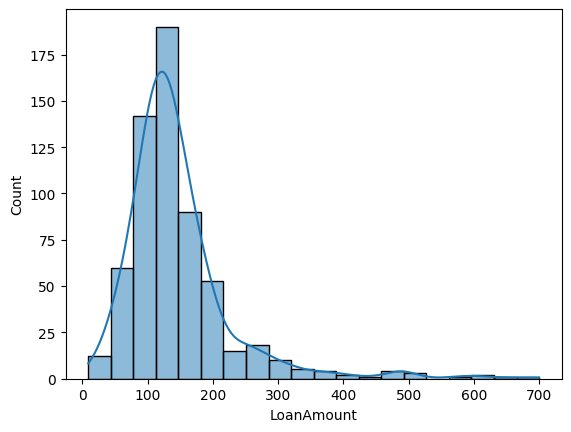

In [26]:
sns.histplot(kde=True,x=df_imp['LoanAmount'],bins=20)

In [27]:
df_train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [28]:
df_median['LoanAmount'].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [29]:
df_imp['LoanAmount'].describe()

count    614.000000
mean     146.412162
std       84.037468
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

We can see from the above description of the imputed data using the median and the iterative imputer, the difference compared to the original dataset is relatively small due to the original dataset only having a small amount of missing value. For this case, I will be using the imputation from iterative imputer for visualizing the data in both this notebook and the dashboard in Tableau due to the data being slightly more aligned with what the original data is conveying about our customers (the mean is closer with the original data compared with the median imputation).

## Visualization

We will be doing 2 types of visualization, univariate and multivariate visualization. 

### Univariate Visualization

Univariate visualization is where we examine each variable invidiually. We will mainly be using bar plot for this. 

In [30]:
df_imp['Credit_History'] = df_imp['Credit_History'].astype('str')

In [31]:
df_cat = df_imp.drop(axis=1,columns='Loan_ID')
categorical_cols = df_cat.select_dtypes(include=['object']).columns

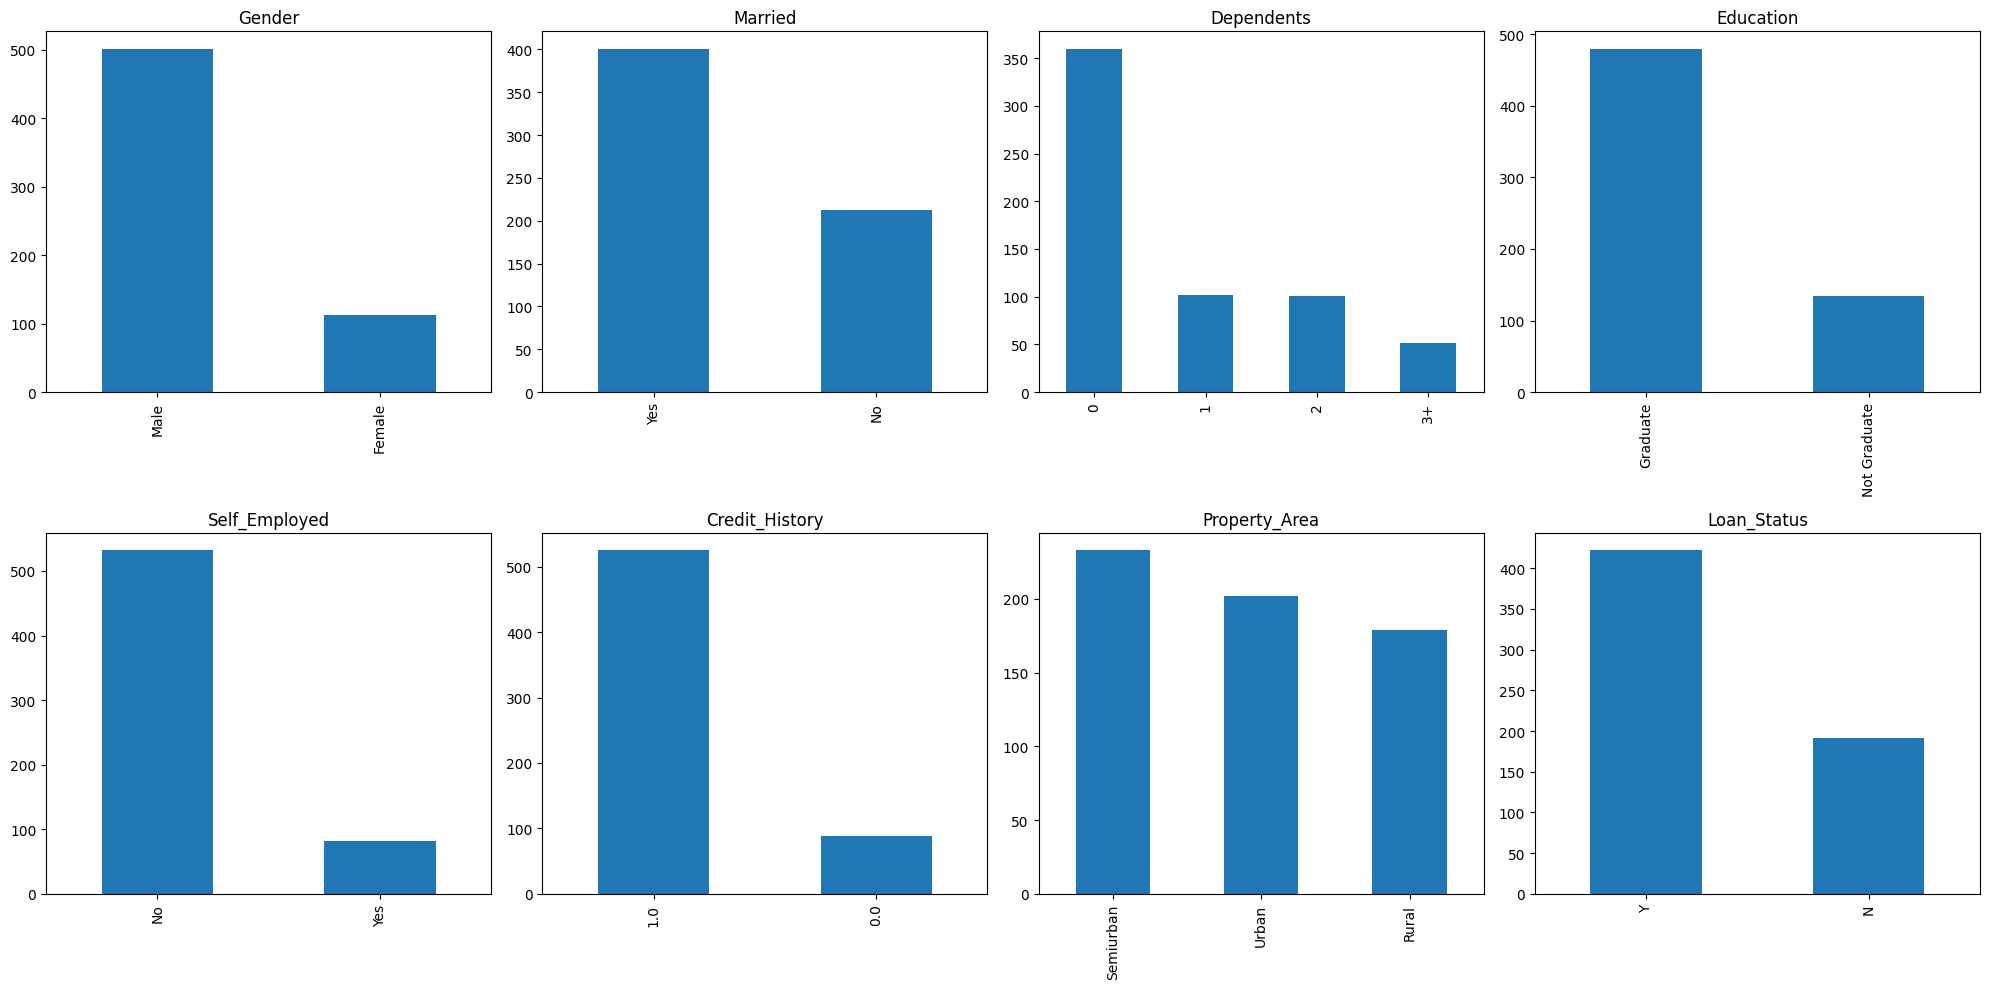

In [32]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# flatten the axes array
axs = axs.ravel()

for i, col in enumerate(categorical_cols):
    df_cat[col].value_counts().plot(kind='bar', ax=axs[i], title=col)

plt.tight_layout()
plt.show()

From the visualizations above, we can conclude:
- Most of the applicants are male
- They are mostly married
- They tend to not have any dependents
- Most of the applicants are graduates
- A large amount of them are not self-employed and have good credit history
- They mainly comes from different property areas and the area of our applicants are relatively balanced.
- Most of our applicants are accepted for loans.

In [33]:
df_imp['LoanAmount'].describe()

count    614.000000
mean     146.412162
std       84.037468
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

<Axes: title={'center': 'Loan_Amount_Terms'}>

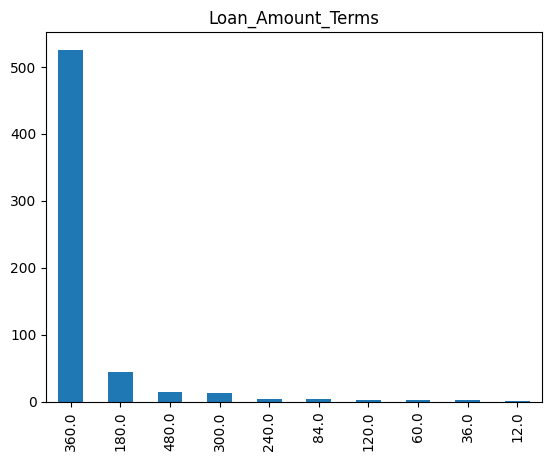

In [34]:
df_imp['Loan_Amount_Term'].value_counts().plot(kind='bar', title='Loan_Amount_Terms')

Applicants are more likely to apply for longer periods of loans (180,360,480 days).

Next, we will be doing visualization for the numerical variables.

In [35]:
df_imp['ApplicantIncome'] = df_imp['ApplicantIncome'].astype('float64')

In [36]:
num_column = df_imp.select_dtypes(include=['float64']).columns

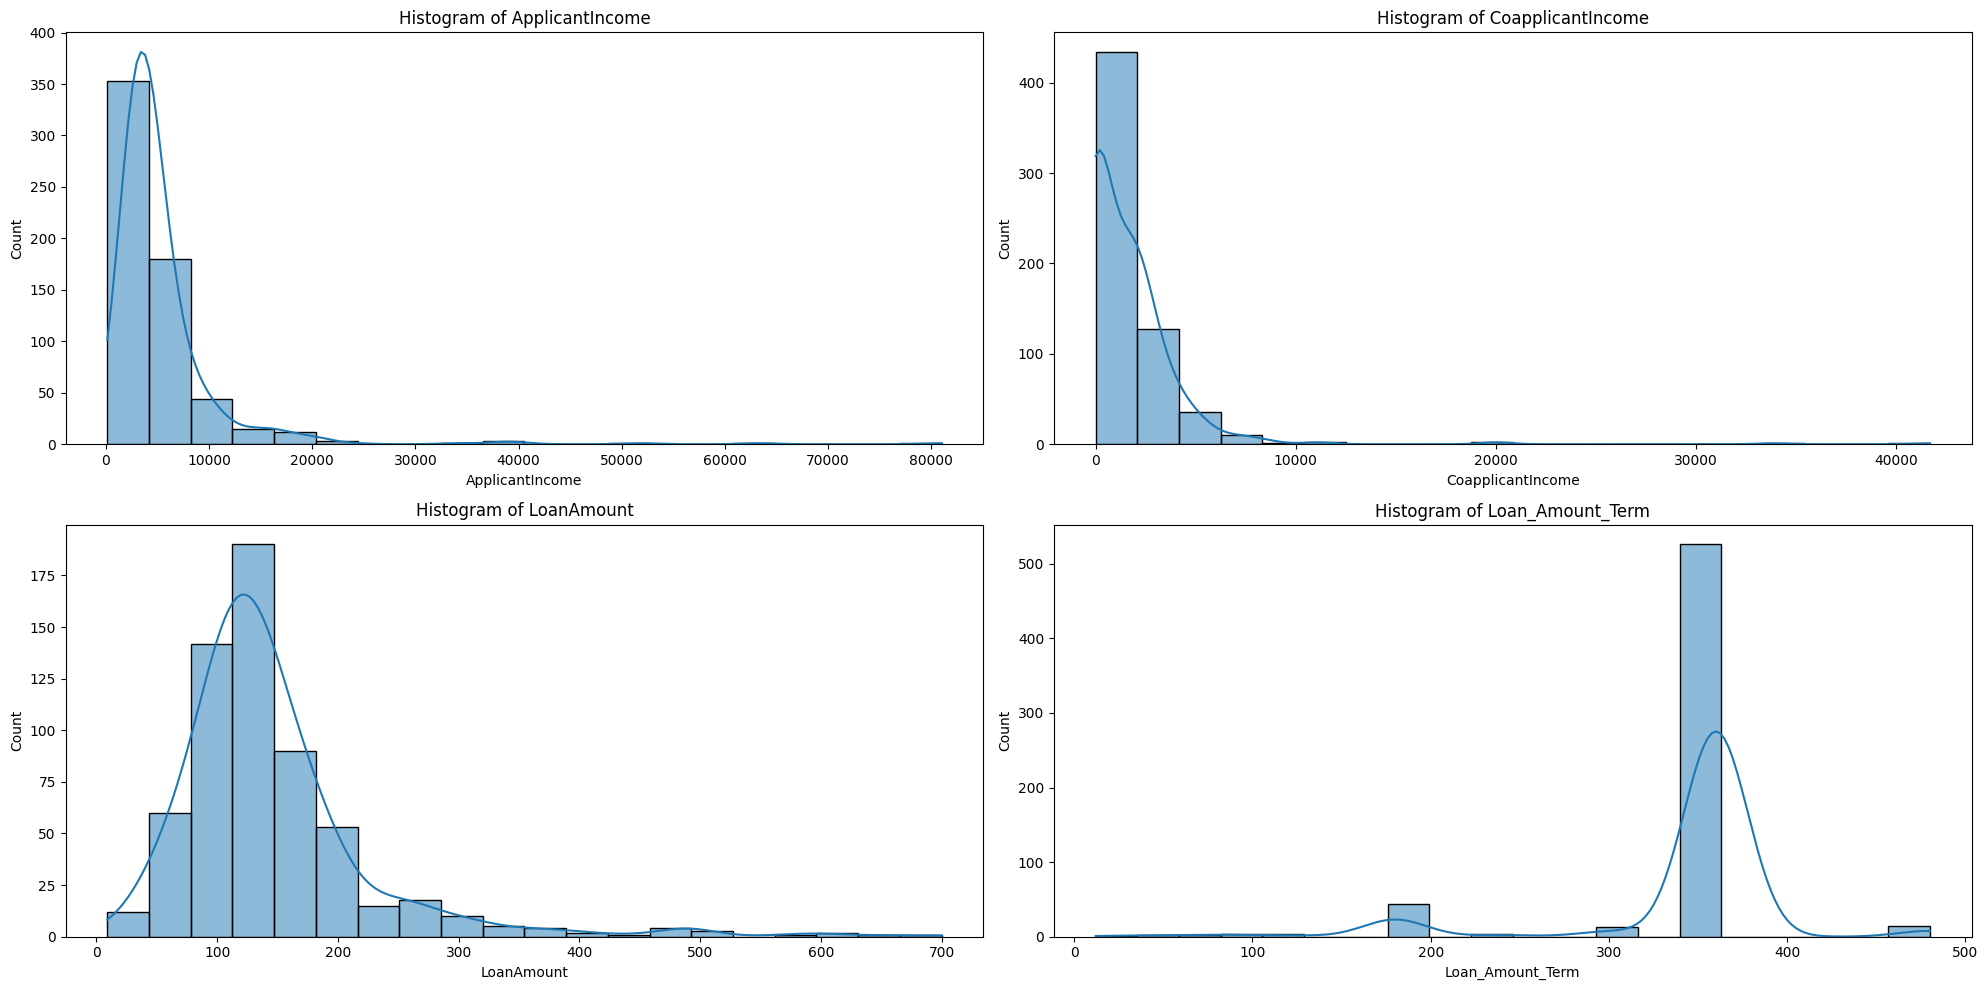

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# flatten the axes array
axs = axs.ravel()

for i, col in enumerate(num_column):
    sns.histplot(kde=True,x=df_imp[col],bins=20, ax=axs[i])
    axs[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

From the above visualizations, we can conclude:
- Most of the applicant income are centered around 3000-5000.
- Coapplicant income tend to have peaks at 0, this is due to most applicants not having a coapplicant.
- The amount of loan are mainly around 50 - 200.
- Most applicants are applying for term of 360 days. 

Next, we will be using a boxplot to see the amount of outliers in our data.

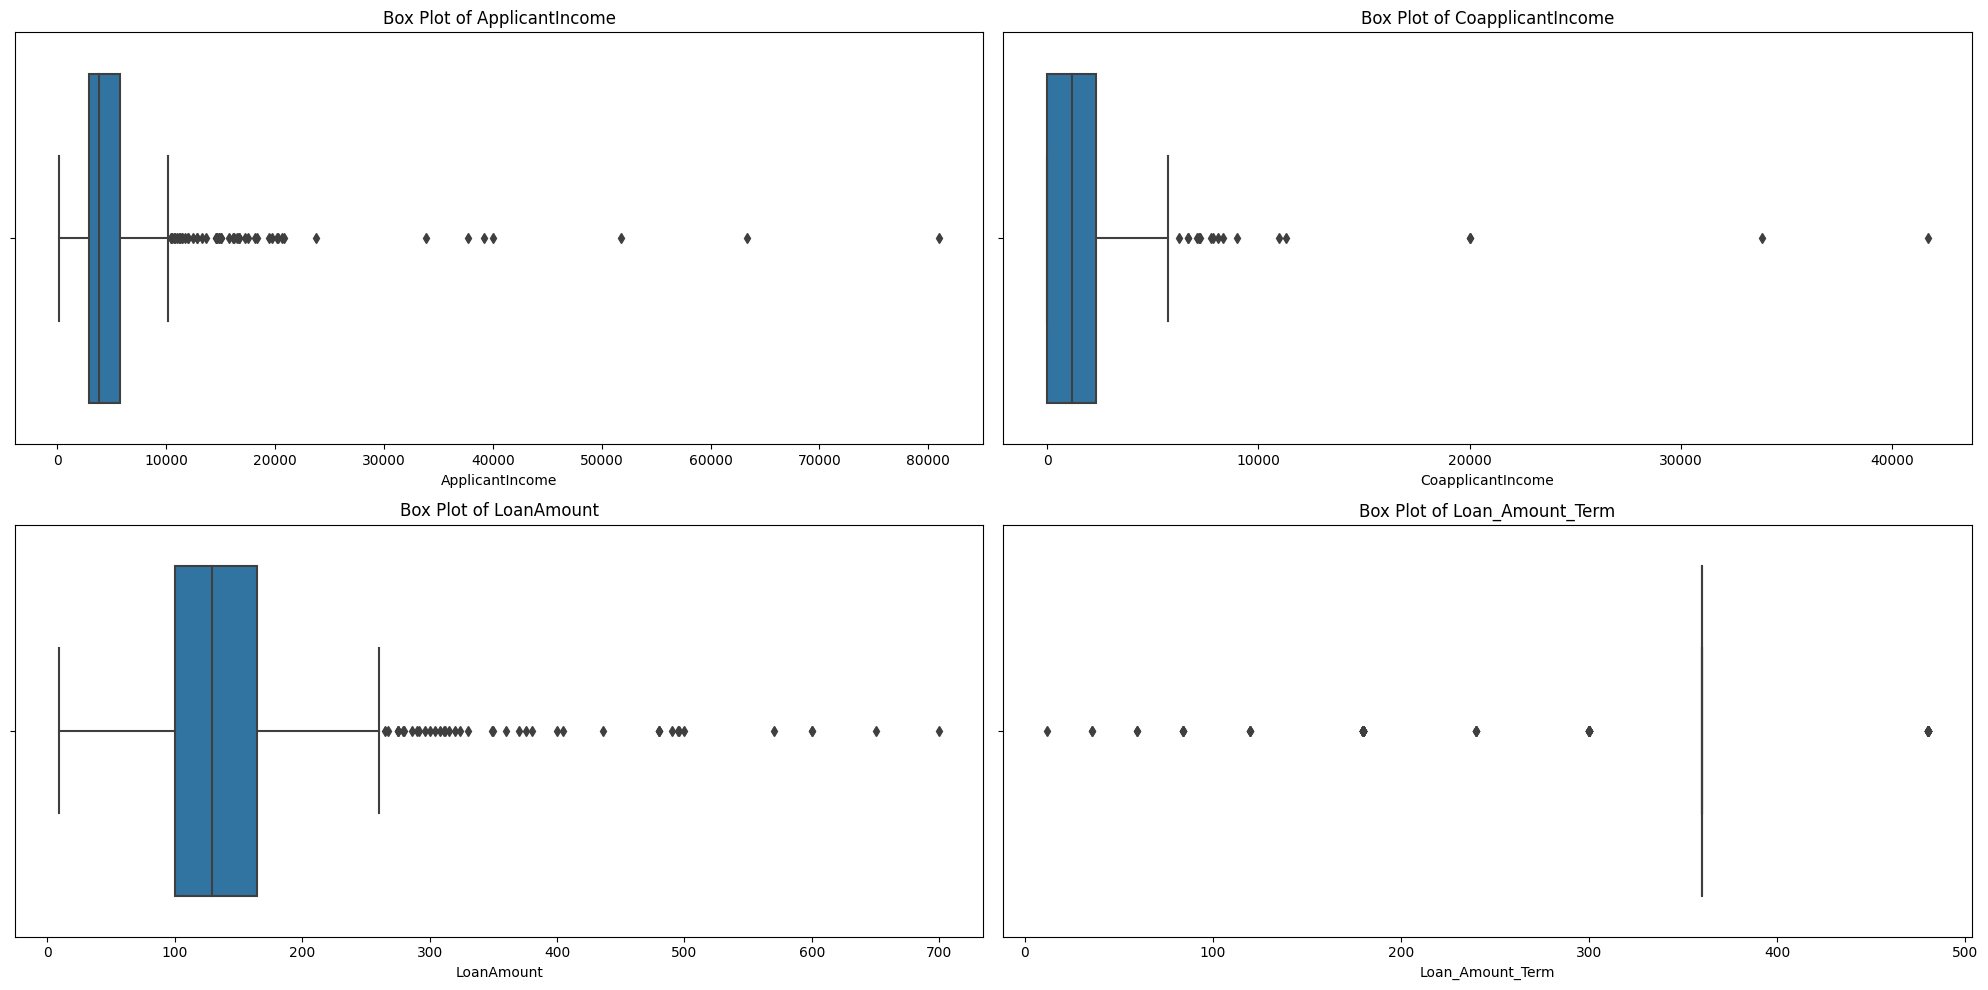

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# flatten the axes array
axs = axs.ravel()

for i, col in enumerate(num_column):
    sns.boxplot(x=df_imp[col], ax=axs[i])
    axs[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

We can see from our visualization above,  our data has a good amount of outlier especially in the applicant income. This is because, applicants could have different jobs with different amount of incomes that could result in the data being skewed heavily.

### Multivariate Visualization

Next, we will be doing multivariate visualization to see the effects of the variable with respect to the loan status, to see if those variables could affect the chances for an applicant to be accepted or not for a loan.

We will be using a stacked bar plot to show the visualizations.

In [39]:
stacked_columns = ['Gender','Married','Dependents','Education',	'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

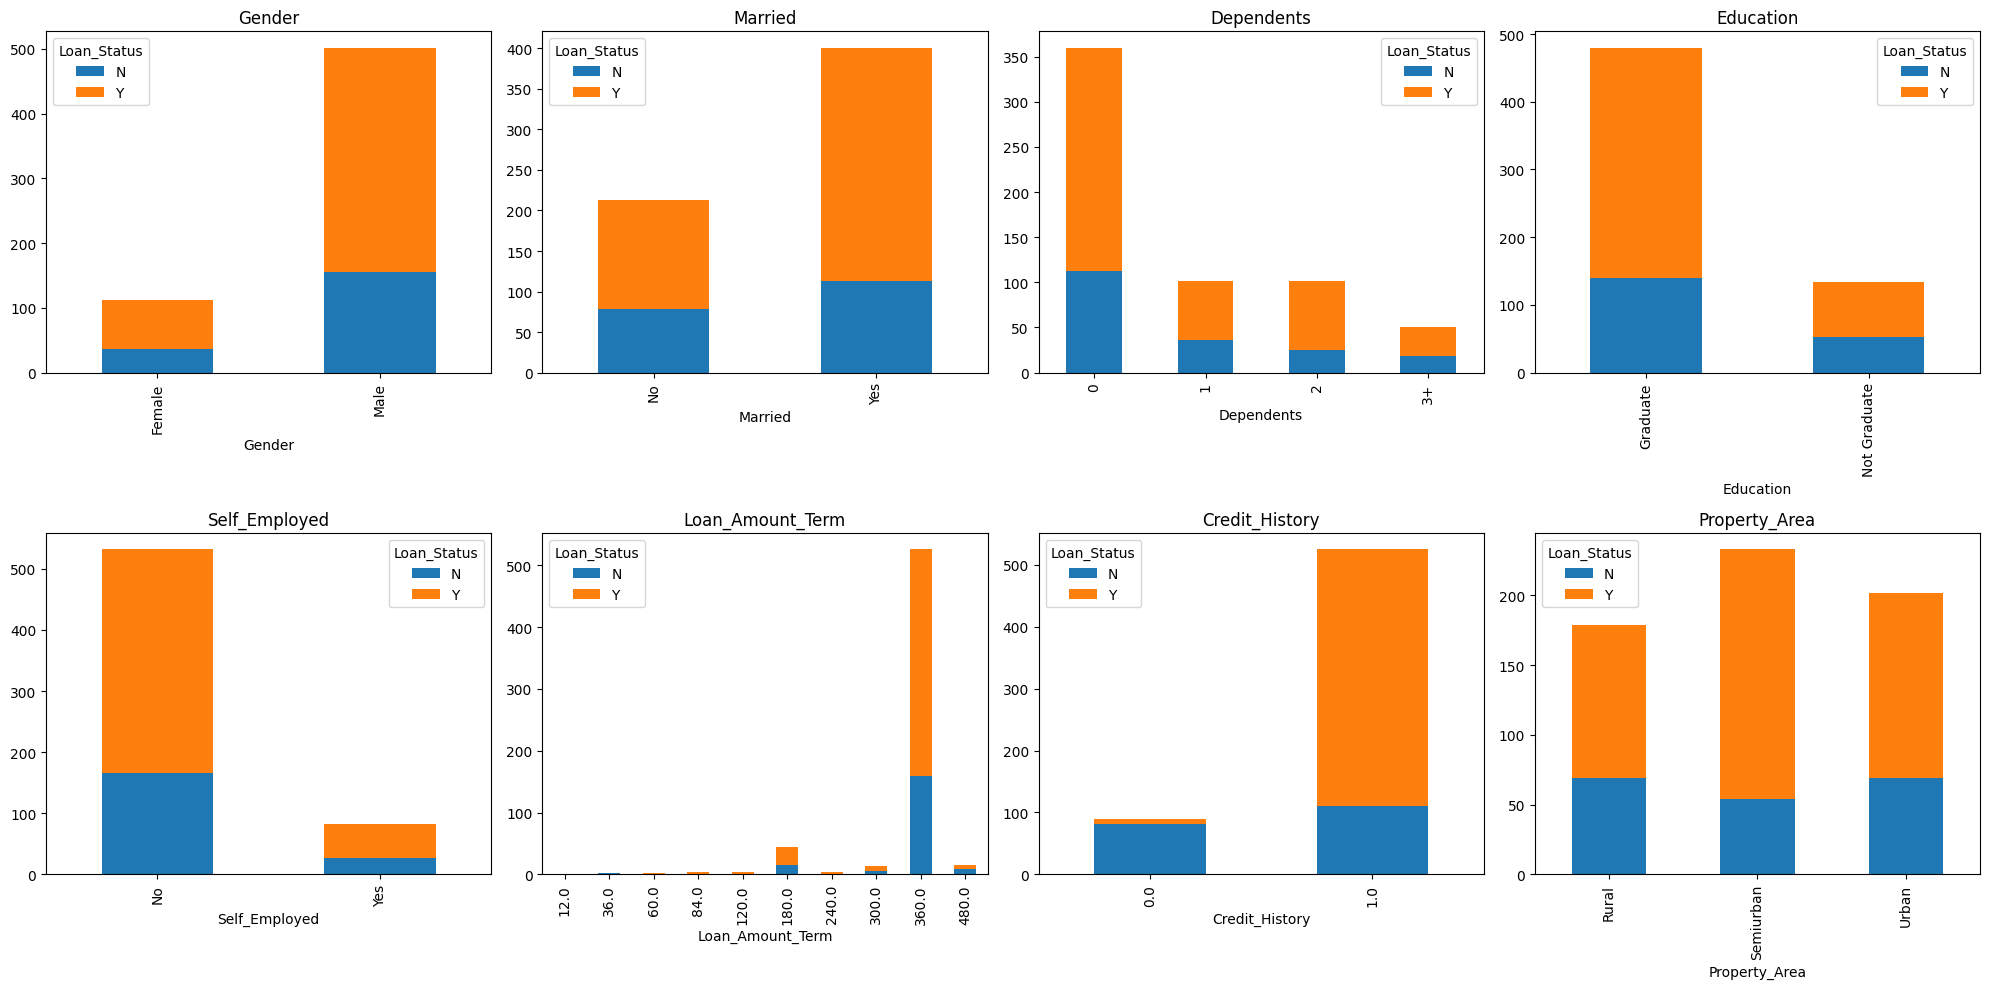

In [40]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# flatten the axes array
axs = axs.ravel()
for i, col in enumerate(stacked_columns):
    data = df_imp.pivot_table(index=col, columns='Loan_Status', aggfunc='size').fillna(0)
    data.plot(kind='bar', stacked=True, ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

From the visualizations above, it can be hard to see if certain variables affect due to the low amount of data that we have. To circumvent for this, we will be normalizing the data from a scale of 0 to 1.

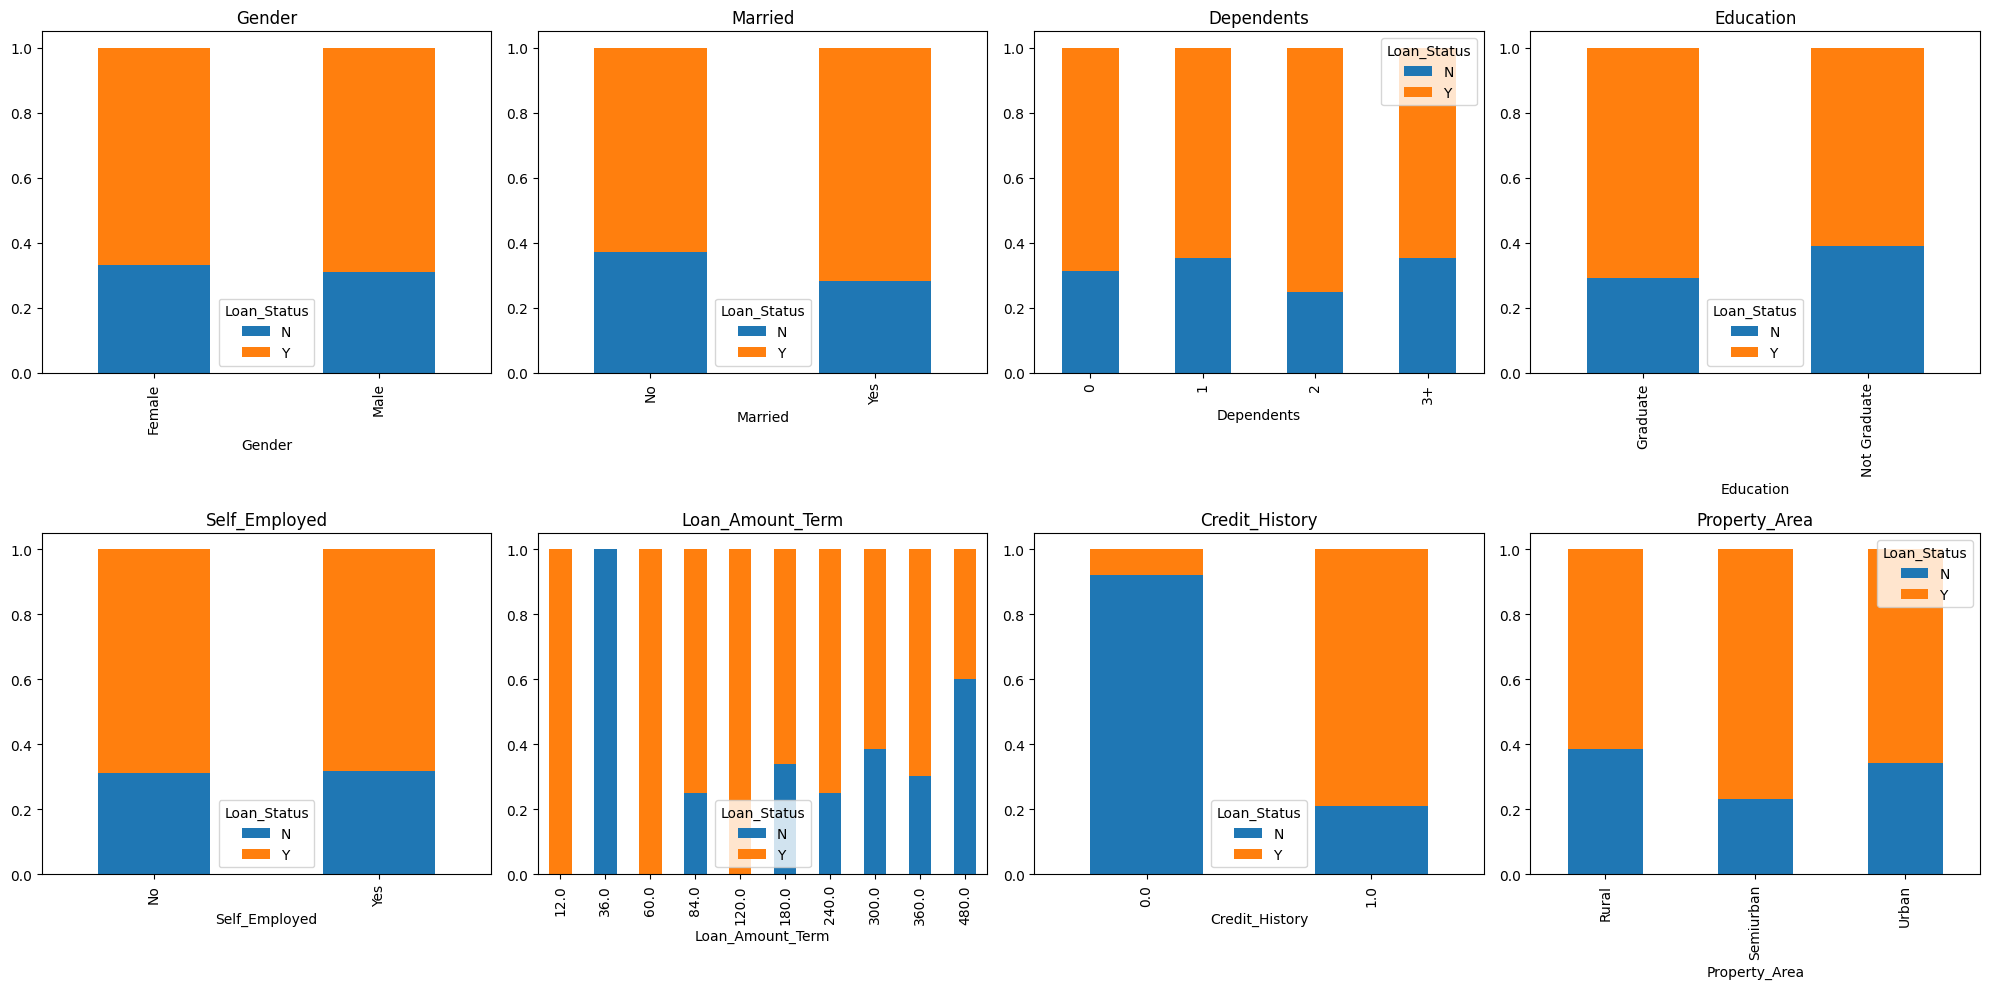

In [41]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# flatten the axes array
axs = axs.ravel()

for i, col in enumerate(stacked_columns):
    data = df_imp.pivot_table(index=col, columns='Loan_Status', aggfunc='size').fillna(0)
    data = data.apply(lambda x: x / x.sum(), axis=1)  # normalize the data
    data.plot(kind='bar', stacked=True, ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

Now the visualization is far more clear, and we can conclude the following:
- Gender does not seem to affect the chances of a loan being rejected or not.
- Married applicants are slightly more likely to be accepted for a loan.
- Applicants with 2 dependants are more likely to be accepted, but this could likely just be coincidence due to the small amount of data.
- Graduates are more likely to be accepted for a loan compared to non-graduates.
- Being self-employed does not affect the chances of being accepted for a loan.
- Longer term loans are harder to be accepted for compared to shorter amount of loans (The outlier in 36 days could likely be due to the very small sample size for that specific term).
- Bad credit history are most likely to be rejected, this seems to be the variable that most affect the chances of a loan being accepted or not.
- Applicants in semiurban properties are more likely to be accepted for a loan.

A couple of explanation for the variables that affect the loan status could be because:

- **Married applicants**: Married individuals might be perceived as more stable or financially secure, which could be why they have a slightly higher acceptance rate.

- **Graduates**: Graduates are often expected to have higher earning potential and stable employment, which could increase their likelihood of loan approval.

- **Loan Term**: Longer-term loans represent a higher risk for the lender because there's more uncertainty over a longer period. This could make them harder to get approved.

- **Credit History**: Good credit history is often a strong indicator of a borrower's ability to repay a loan. Those with bad credit histories may have demonstrated behaviors that make lenders wary.

- **Property Location**: Lenders might perceive semiurban properties as a good compromise between urban (high cost, high risk) and rural (low cost, potentially lower stability), which could lead to a higher acceptance rate.

Next, we will look at the numerical variables and see how they affect their decision on the loan status. Rather than comparing the different loan status in a numerical way (histogram, etc.), we can instead do discretization in order to make the visualization easier to be understood. The first step is to see the distribution of our data using the describe function on our data to see the appropriate amount of discretization to use.

In [42]:
df_imp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423
std,6109.041673,2926.248369,84.037468,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,129.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


We can see that Coappliant Income has a lot of 0 values in the data due to the fact that not every applicant has another coapplicant when applying for their loan. Which is why to help simplify the visualization, We will create a new column called Total_Income where it is the sum of the Applicant and Coapplicant Income. We will also not visualize the loan amount term since we already have done that in the previous segment.

In [43]:
df_imp['Total_Income'] = df_imp['ApplicantIncome'] + df_imp['CoapplicantIncome']

Next, We will create a new column of loan amount to total income ratio to see if someone were to apply a low amount of loan in respect to their high income, would their loan be approved often compared to someone who applied with a high loan and low income?

In [44]:
df_imp['LoanIncomeRatio'] = (df_imp['LoanAmount'] / df_imp['Total_Income'])*100

In [45]:
df_imp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income,LoanIncomeRatio
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,7024.705081,2.401664
std,6109.041673,2926.248369,84.037468,64.428629,6458.663872,0.894732
min,150.000000,0.000000,9.000000,12.000000,1442.000000,0.252292
25%,2877.500000,0.000000,100.250000,360.000000,4166.000000,1.936150
50%,3812.500000,1188.500000,129.000000,360.000000,5416.500000,2.417435
75%,5795.000000,2297.250000,164.750000,360.000000,7521.750000,2.834513
max,81000.000000,41667.000000,700.000000,480.000000,81000.000000,8.271164


Before we visualize, the hypothesis that we will be creating are that:
- High income applicants are more likely to be accepted.
- High loan to income ratio means that the applicants has a high loan for their low income which results their application being rejected more often.

We will be using the bins below to help differentiate between an applicant with a low, medium, high and very high income for the discretization.

In [46]:
bins = [0, 2500, 5000, 10000, 100000]
labels = ['Low', 'Medium', 'High', 'Very high']
df_imp['Total_Income_Bins'] = pd.cut(df_imp['Total_Income'], bins=bins, labels=labels)

And we will be using the bins below to help differentiate between an applicant with a low, medium, high and very high loan-income ratio for the discretization.

In [47]:
bins = [0, 1, 2, 4, 10]
labels = ['Low', 'Medium', 'High', 'Very high']
df_imp['LoanIncomeRatio_Bins'] = pd.cut(df_imp['LoanIncomeRatio'], bins=bins, labels=labels)

In [48]:
binned_columns = ['Total_Income_Bins','LoanIncomeRatio_Bins']

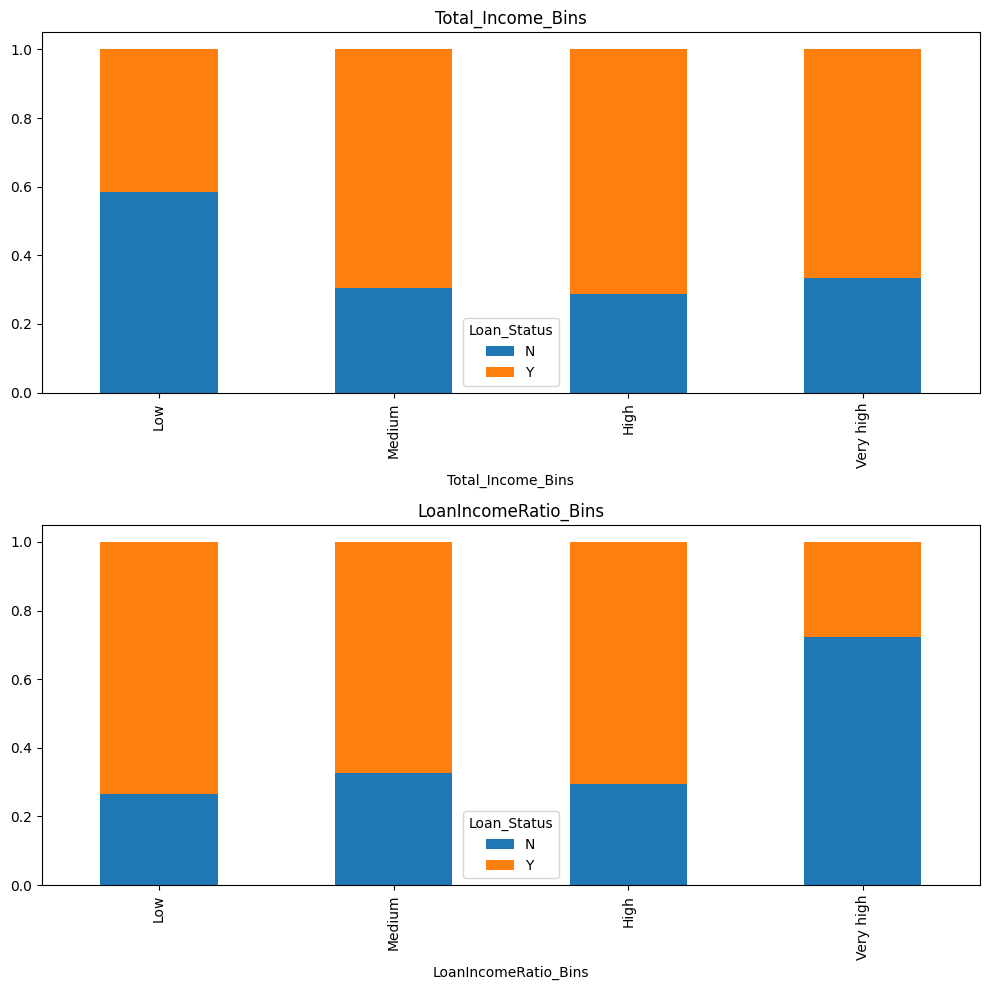

In [49]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# flatten the axes array
axs = axs.ravel()
for i, col in enumerate(binned_columns):
    data = df_imp.pivot_table(index=col, columns='Loan_Status', aggfunc='size').fillna(0)
    data = data.apply(lambda x: x / x.sum(), axis=1)  # normalize the data
    data.plot(kind='bar', stacked=True, ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

It seems from the 2 visualizations above, our previous hypothesis was correct. The reasonings on why this could happen are:

- **High-income applicants**: High-income individuals are likely to have more financial stability and the means to repay loans, which could make them more attractive to lenders. They may also have better credit histories, another factor that could contribute to higher approval rates.

- **High loan-to-income ratio**: A high loan-to-income ratio suggests that a large portion of the borrower's income would have to go toward loan repayment, leaving less income for other expenses. This could lead to difficulties in making loan repayments, hence why applications with a high loan-to-income ratio might be rejected more often. 

## Further Improvement Plans

- **Data Collection**: Ensuring that data is collected consistently and accurately is crucial. We might need to refine our data collection methods to reduce the instances of missing or incorrect data. Including more demographic and financial variables might also enhance our analysis.

- **Feature Engineering**: Creating new features, like the loan-to-income ratio, has proven useful. We could continue exploring other meaningful features that might have predictive power for loan approval.

- **Model Development**: We could consider developing machine learning models to predict loan approval. These models can incorporate all of the features of the dataset and provide predictions on approval rates, helping to automate and enhance decision-making.

- **Data Refresh**: This analysis should be repeated as we collect more data over time. This allows us to monitor changes and trends, and to ensure that our models and conclusions are still valid.

- **Disparity and Fairness Analysis**: It would be beneficial to conduct an analysis to identify if there are any unintentional biases in loan approval towards any particular group. This ensures compliance with fairness and equality standards.

## Conclusion

Based on all of the visualization that we have done, the following conclusions can be made:

- **Education**: Our data indicates that married applicants and those with a graduate level education tend to have a higher chance of loan approval. This information can be used in risk assessment and marketing strategies. We might consider promoting our loan products more heavily to these demographic groups.

- **Credit History**: As we expected, a good credit history significantly improves an applicant's chances of getting their loan approved. This emphasizes the importance of continuing to make credit history a crucial factor in our loan approval process.

- **Property Area**: It's interesting to note that applicants from semiurban areas have a higher loan approval rate. This could indicate potential growth areas for our company, suggesting we may want to increase our marketing efforts or branch presence in these regions.

- **Income and Loan Amount**: Our analysis shows that higher income applicants are more likely to be approved for a loan, and a high loan-to-income ratio often results in loan rejection. This finding confirms the importance of assessing the applicant's ability to repay, suggesting that we should maintain or even tighten our income verification standards and we could adjust our loan-to-income ratio guidelines if necessary.

- **Dependents**: Although we need more data to be certain, our current analysis suggests that having two dependents may increase the chance of loan approval. While more research is needed, we should not overlook the role of family size in our loan-granting process.